# Augment the images to get more data for training

## Download the data and create train/test datasets

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

boundary = 60000

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
X = X.astype(np.uint16)
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:boundary], X[boundary:], y[:boundary], y[boundary:]

In [3]:
X_train.shape

(60000, 784)

## Function to shift the images

In [4]:
from scipy.ndimage.interpolation import shift

def shift_image(image, direction):
    
    square_image = image.reshape((28, 28))
    
    if direction == 'left':
        shifted_image = shift(square_image, [0, -1])
    elif direction == 'right':
        shifted_image = shift(square_image, [0, 1])
    elif direction == 'up':
        shifted_image = shift(square_image, [-1, 0])
    elif direction == 'down':
        shifted_image = shift(square_image, [1, 0])
    else:
        print('SHIFT ERROR')
        
    shifted_image_flat = shifted_image.flatten()
    
    return shifted_image_flat

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28,28))

(784,)


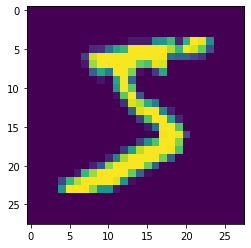

In [6]:
a_shifted_image = shift_image(X_train[0], 'up')
print(a_shifted_image.shape)

plt.imshow(a_shifted_image.reshape((28,28)))

In [7]:
X_train_shift_left = []
X_train_shift_right = []
X_train_shift_up = []
X_train_shift_down = []
for image in X_train:
    X_train_shift_left.append(shift_image(image, 'left'))
    X_train_shift_right.append(shift_image(image, 'right'))
    X_train_shift_up.append(shift_image(image, 'up'))
    X_train_shift_down.append(shift_image(image, 'down'))
    
l_array = np.array(X_train_shift_left, dtype=np.int16)
r_array = np.array(X_train_shift_right, dtype=np.int16)
u_array = np.array(X_train_shift_up, dtype=np.int16)
d_array = np.array(X_train_shift_down, dtype=np.int16)

In [8]:
l_array.shape

(60000, 784)

In [14]:
all_train_data = np.r_[X_train, l_array, r_array, u_array, d_array]

In [18]:
all_train_data.shape

(300000, 784)

In [16]:
all_train_labels = np.r_[y_train, y_train, y_train, y_train, y_train]

In [17]:
all_train_labels.shape

(300000,)

## Train a model with the augmented data

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
kn_clf.fit(all_train_data, all_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score

kn_clf_predictions = kn_clf.predict(X_test)
accuracy_score(y_test, kn_clf_predictions)